###Relating Gender and IQ
=======================

Going back to the brain size + IQ data, test if the VIQ of male and
female are different after removing the effect of brain size, height and
weight.

Notice that here 'Gender' is a categorical value. As it is a non-float
data type, statsmodels is able to automatically infer this.


In [1]:
print("hi this is python")

hi this is python


In [2]:
import pandas
from statsmodels.formula.api import ols


In [3]:
data = pandas.read_csv('/Users/Ralf/ownCloud/StatsPythonExample/brain_size.csv', sep=';', na_values='.')
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


In [4]:
model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Tue, 27 Oct 2015   Prob (F-statistic):             0.0184
Time:                        10:26:46   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

In [5]:
# here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

<F test: F=array([[ 0.68319608]]), p=0.414087844124, df_denom=35, df_num=1>


In [6]:
###############################################################################
# Here we plot a scatter matrix to get intuitions on our results.
# This goes beyond what was asked in the exercise

# This plotting is useful to get an intuitions on the relationships between
# our different variables

from pandas.tools import plotting
import matplotlib.pyplot as plt

In [7]:
# Fill in the missing values for Height for plotting
data['Height'].fillna(method='pad', inplace=True)

# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap


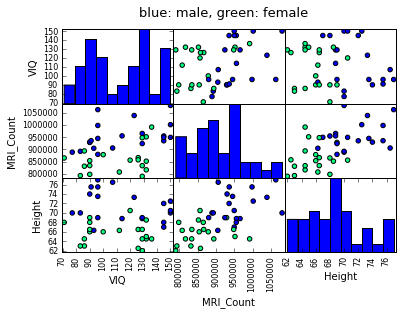

In [8]:
%matplotlib inline 
plotting.scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()